### PRINCIPAL COMPONENT ANALYSIS
___

*From: https://nirpyresearch.com/classification-nir-spectra-principal-component-analysis-python/*

In [56]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from scipy.signal import savgol_filter

from sklearn.decomposition import PCA as sk_pca
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.cluster import KMeans

import os.path
import spectrai as spa


%load_ext autoreload
%autoreload 2
%matplotlib inline  

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [57]:
# Loading
DATA_PATH = os.path.join('..', 'data')
ARGENTINA_PATH =  os.path.join('arg-romina', 'spectra')
ARGENTINA_XRF_URL = os.path.join(DATA_PATH, 'arg-romina', 'measurements', '2015-xrf-results-mean-and-errors.xls')
DATA_URL = os.path.join(DATA_PATH, ARGENTINA_PATH, '*.CSV')

X, X_names, y, y_names = spa.load_data(DATA_URL, ARGENTINA_XRF_URL)
feat = X

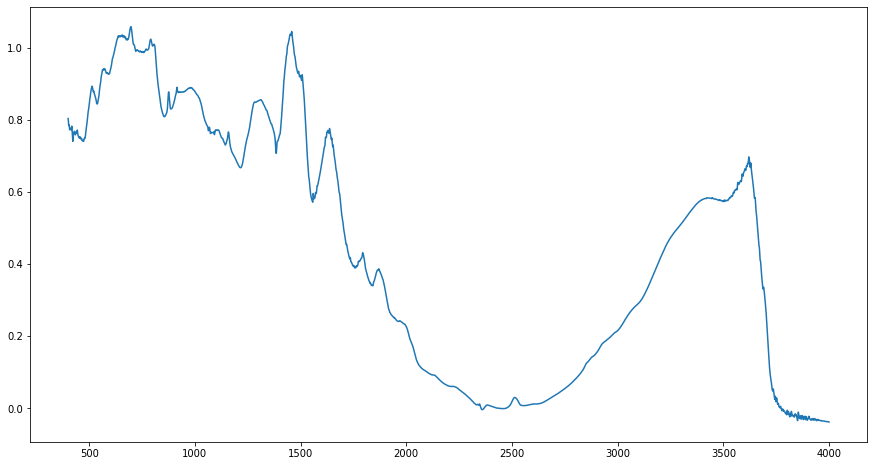

In [58]:
fig, ax = plt.subplots(figsize=(15,8))
ax.plot(X_names, feat[0])

In [59]:
# Calculate first derivative applying a Savitzky-Golay filter
dfeat = savgol_filter(feat, 25, polyorder = 5, deriv=1)

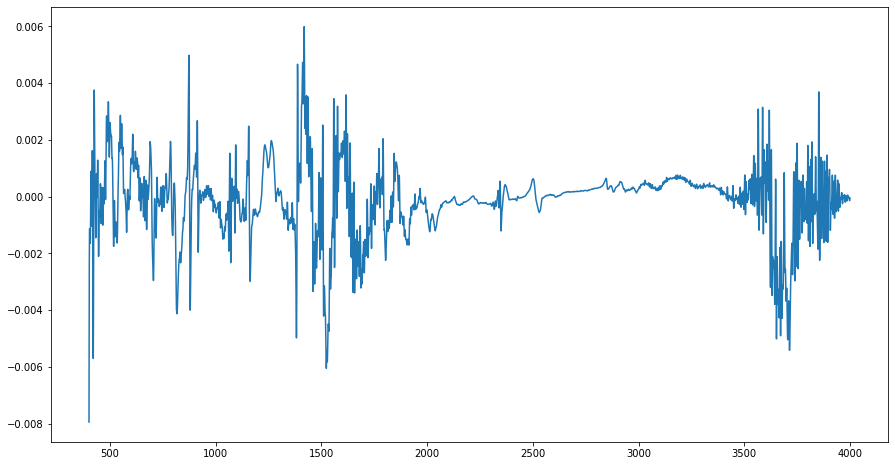

In [60]:
fig, ax = plt.subplots(figsize=(15,8))
ax.plot(X_names, dfeat[0])

## PCA

In [61]:
# Initialise
skpca1 = sk_pca(n_components=10)
skpca2 = sk_pca(n_components=10)

In [62]:
# Scale the features to have zero mean and standard devisation of 1
# This is important when correlating data with very different variances
nfeat1 = StandardScaler().fit_transform(feat)
nfeat2 = StandardScaler().fit_transform(dfeat)

In [63]:
# Fit the spectral data and extract the explained variance ratio
X1 = skpca1.fit(nfeat1)
expl_var_1 = X1.explained_variance_ratio_
# Fit the first data and extract the explained variance ratio
X2 = skpca2.fit(nfeat2)
expl_var_2 = X2.explained_variance_ratio_

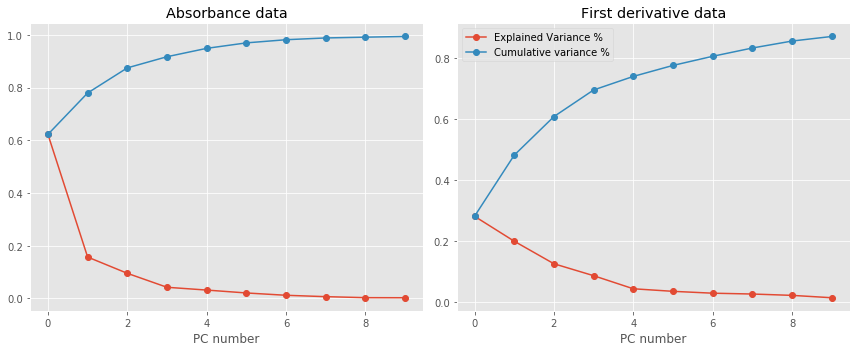

In [64]:
# Plot data
with plt.style.context(('ggplot')):
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
    fig.set_tight_layout(True)
    
    ax1.plot(expl_var_1,'-o', label="Explained Variance %")
    ax1.plot(np.cumsum(expl_var_1),'-o', label = 'Cumulative variance %')
    ax1.set_xlabel("PC number")
    ax1.set_title('Absorbance data')
    
    ax2.plot(expl_var_2,'-o', label="Explained Variance %")
    ax2.plot(np.cumsum(expl_var_2),'-o', label = 'Cumulative variance %')
    ax2.set_xlabel("PC number")
    ax2.set_title('First derivative data')
    plt.legend()
    plt.show()

## Clustering

In [65]:
skpca2 = sk_pca(n_components=4)

# Transform on the scaled features
Xt2 = skpca2.fit_transform(nfeat2)

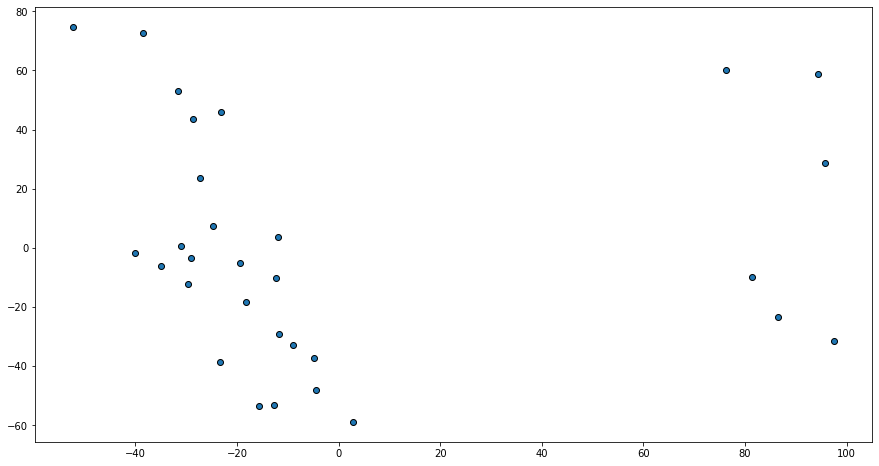

In [66]:
# How well PC1 and 2 discriminate spectra?
fig, ax = plt.subplots(figsize=(15,8))
ax.scatter(Xt2[:,0],Xt2[:,1], edgecolors='k')